In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.chdir('..')
import rwpropa as rw

______________________________________________________________
simulate with a diffusion coefficient of  2e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_100.0.pkl
CPU times: user 8.74 s, sys: 43.3 ms, total: 8.78 s
Wall time: 8.78 s
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  2e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_35.93813663804625.pkl
CPU times: user 519 ms, sys: 90 µs, total: 519 ms
Wall time: 518 ms
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  2e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_12.915496650148828.pkl
CPU times: user 1.41 s, sys: 4.18 ms, total: 1.42 s
Wall time: 1.42

KeyboardInterrupt: 

FileNotFoundError: [Errno 2] No such file or directory: 'comparison/data/raw_data/rwpropa_0.027825594022071257.pkl'

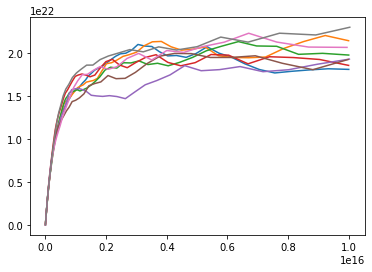

In [3]:
kappa = 2.*10**22
energy = 3*10**16
step_sizes = np.logspace(9, 13, 12)[::-1]
traj_max = 10**16

for step_size in step_sizes:
    print('______________________________________________________________')
    nr_steps = int(traj_max/step_size)
    sim = rw.IsotropicSimulation(nr_particles = 10**2, energy = energy, step_size = step_size, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 100)
    file_name = 'comparison/data/raw_data/rwpropa_'+str(step_size/10**11)
    %time sim.simulate(file_name)
    df = pd.read_pickle(file_name+'.pkl')
    sta = rw.Statistics(df)
    df_kappas = sta.get_diffusion_coefficients()
    plt.plot(df_kappas['l'], (df_kappas['kappa']))
    file_name = 'comparison/data/sim_result_rwp_'
    np.save(file_name+str(step_size/10**11)+'_l.npy', np.array(df_kappas['l']))
    np.save(file_name+str(step_size/10**11)+'_kappa.npy', np.array(df_kappas['kappa']))

plt.loglog()

### CRPropa simulations
Run **python3 sim.py** in the folder *rwpropa_project/rwpropa/comparison* to generate all relevant CRPropa files for the comparison test. The parameters should be similar to the RWPropa simulations, such as max_traj, diffusion coefficients, step_sizes.

no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data


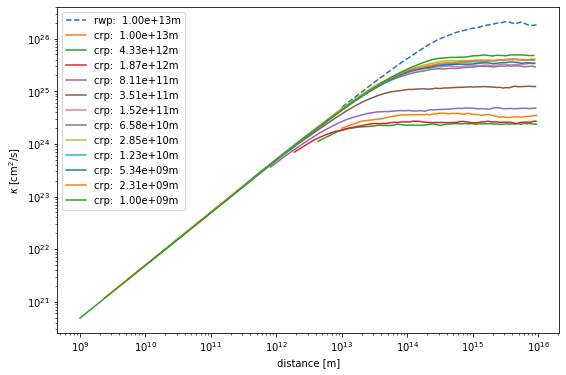

In [15]:
### load crpropa data
step_sizes = np.logspace(9, 13, 12)[::-1]

fig, ax1 = plt.subplots(figsize=(9,6))
kappas_crp = []
kappas_rwp = []
steps_crp = [] 
steps_rwp = []
for step_size in step_sizes:
    n_max = -1
    try:
        rwp_l = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_l.npy')
        rwp_kappa = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(rwp_kappa[:-10])
        kappas_rwp.append(kappa)
        steps_rwp.append(step_size)
        ax1.plot(rwp_l[:n_max], np.array(rwp_kappa[:n_max])*10**4, ls='--', label=str("rwp:  {:.2e}".format(step_size))+'m')
    except:
        print('no data')
    
    try:
        crp_l = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_l.npy')
        crp_kappa = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(crp_kappa[:-10])
        kappas_crp.append(kappa)
        steps_crp.append(step_size)
        ax1.plot(crp_l[:n_max], np.array(crp_kappa[:n_max])*10**4, ls='-', label=str("crp:  {:.2e}".format(step_size))+'m')
    except:
        print('no data')
        
ax1.set_xlabel('distance [m]')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

plt.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(9,6))
plt.scatter(steps_rwp, kappas_rwp, c='k', label='rwp')
plt.scatter(steps_crp, kappas_crp, c='r', label='crp')

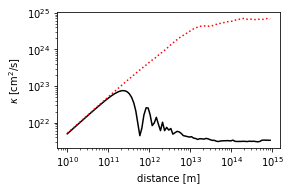

In [7]:
### load crpropa data
bB = 0.1
crp_d = np.load('sim_result_ana_d.npy')
crp_kappa_perp = np.load('sim_result_ana_kappa_perp.npy')
crp_kappa_para = np.load('sim_result_ana_kappa_para.npy')

fig, ax1 = plt.subplots(figsize=(4,2.5))

n_max = -1
ax1.plot(crp_d[:n_max], np.array(crp_kappa_perp[:n_max])*10**4, label='$\kappa_\perp$ (EOM)', color='k')
ax1.plot(crp_d[:n_max], np.array(crp_kappa_para[:n_max])*10**4, linestyle=':', label='$\kappa_\parallel$ (EOM)', color='r')


ax1.set_xlabel('distance [m]')
#ax1.axvline(x=mfp[1], c='grey', ls=':')
#ax1.axvline(x=mfp[2], c='grey', ls='--')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')

#fig.legend()
#plt.savefig('kappas_bB_'+str(bB)+'.pdf')
plt.show()

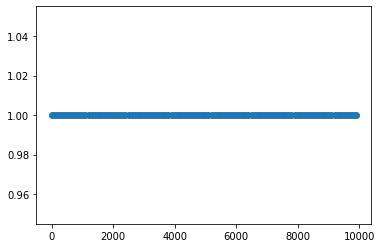

In [45]:
log_list = []
dist = 100
nr = 100
minimum = 1
for i in range(nr):
    value = minimum + i*dist
    log_list.append(value)
    
plt.scatter(log_list, np.ones(len(log_list)))

[]

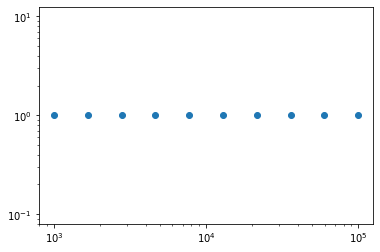

In [88]:
log_list = []
dist = 1000
nr = 10
start = 10**3
end = 10**5
for i in range(0,nr):
    f = start * np.power(end/start*1.0, i/(nr-1.0))
    log_list.append(f)
    
plt.scatter(log_list, np.ones(len(log_list)))
plt.loglog()

[]

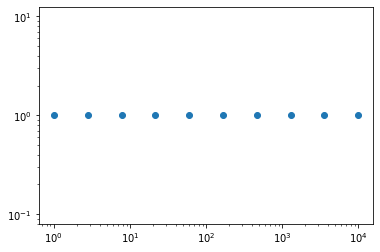

In [70]:
plt.scatter(np.logspace(0, 4, nr), np.ones(nr))
plt.loglog()